首先恭喜各位，通过第一轮的简历筛选，进入线上测试环节。

通过这次线上测试，希望大家能够在限定的时间内，尽自己最大努力，完成一些数据处理和数据建模任务，展现自己对机器学习建模工作的熟悉程度。

## 任务说明
请在这个jupyter notebook中
* 补充完成任务所需要的python代码。可以直接在code cell中编写代码；或者将代码写在.py文件中后在这个notebook中import使用
* 利用markdown cell回答相关的问题或者解释分析思路

完成后，在github上建立一个repo。将这个notebook，相关的.py文件，保存处理结果的excel文件等，push到建立的repo。将repo链接提交给面试官。

## 截止时间
任务的截止提交时间为:

**2019-05-21 10:00:00 a.m**

## 注意事项：
1. 使用python3.6以上版本，如果使用```pandas```等python库，请先升级到最新版本。
2. 请确保面试官在clone各位发布的repo后，能够跑通这个notebook中的代码。
3. 除了实现任务所需的功能，编写的代码具有高可维护性，也是我们非常希望候选人具备的能力。（可参考Refactoring by Kent Beck and Martin Fowler一书中关于"bad code smell"的讨论）
4. 这个测试的目的是检验候选人是否具备高效的完成建模相关工作的能力，不鼓励重复造轮子。建议充分利用```pandas```, ```sklearn```等已有python库完成任务。
5. 请展现自己真实的能力，不要请人代劳。如果候选人试用期阶段表现的实际工作能力明显低于线上测试表现的能力，候选人会被认为采用非诚信手段通过线上测试，将予以坚决辞退。
6. 职场中，Deadline是非常严肃的。无论完成度如何，请务必在截止时间前，提交自己的结果。逾期提交将不予受理。

## 机器学习建模（任务1～任务4）
以下任务基于虚拟的建模数据dataset.csv

建模数据集构成
* id：样本的编号
* dataset：划分了哪些数据用于train, 那些用于test
* label:  0或者1, 只有train数据才给出了label
* 其实字母f开头的列为建模特征

In [2]:
import pandas as pd
model_data = pd.read_csv('model_data.csv')

### 任务1
对dataset中的建模数据进行分析，描述这个数据集的特点。

例如
* 样本量，特征量
* 建模特征缺失率的分布

候选人请追加其他认为有必要进行的分析，并配合数据可视化手段，支持自己的结论。
 

In [157]:
# 请在这里开发其余相关代码
%matplotlib inline
import matplotlib.pyplot as plt
id_num = len(model_data)
char_num = len(model_data.iloc[0])-3
total = id_num * char_num
lack = model_data.isnull().sum(axis=0)[:-3]
rate = [lack[i]/id_num for i in range(char_num)]
x_plt = range(char_num)

<Container object of 3 artists>

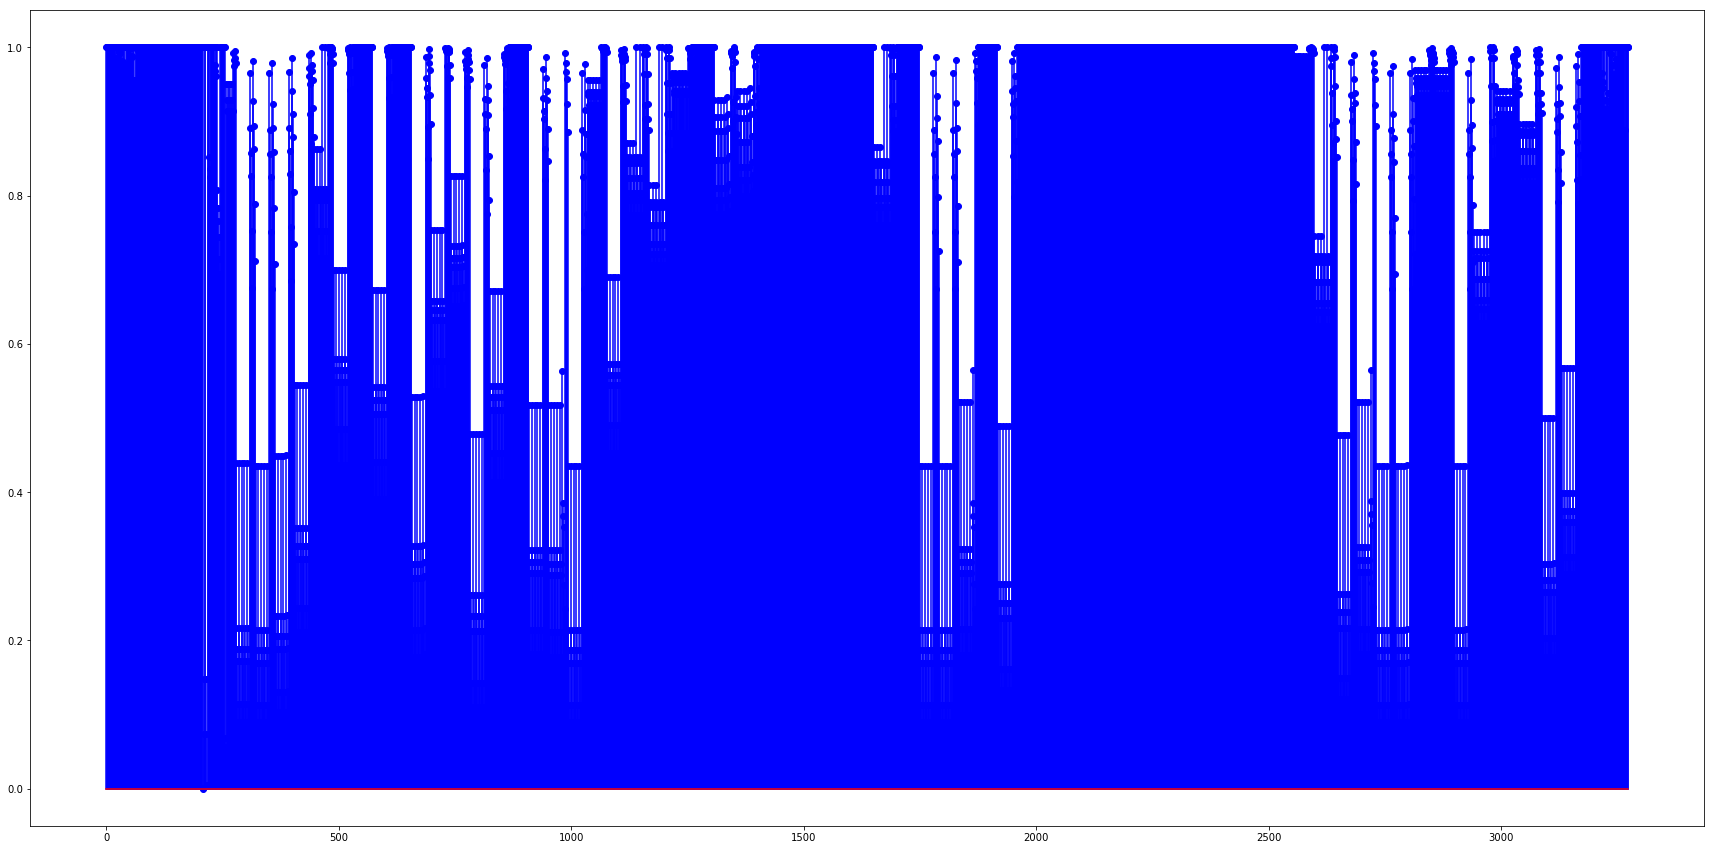

In [161]:
plt.rcParams['figure.figsize'] = (30.0, 15.0)
plt.stem(x_plt, rate, linefmt='b-', markerfmt='bo', basefmt='r-')

### 任务2

请根据train数据，使用3种指定的机器学习算法（都可以在sklearn中找到）分别训练模型。这3种算法是
* xgboost
* logistic regression
* random forest

要求:
* 预测目标为label列
* 模型优化的目标为auc_roc
* 需要对特征进行筛选。每种算法训练的模型，最后使用的特征控制在20个以内。
* 每种算法得到的模型，将模型在test数据集的预测结果(0~1之间的一个分值)保存在csv文件中。面试官会计算候选人模型在test数据集的auc_roc

# xgboost

In [3]:
# 请在这里开发其余相关代码
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import csv
def mod(x):
    tmp = str(x)
    while len(tmp) != 4:
        tmp = '0' + tmp
    return tmp

In [7]:
model_data = pd.read_csv('model_data.csv')

x_train, y_train = model_data['dataset'], model_data['label']
i = 0
while x_train[i] != 'test':
    i += 1

x_train = model_data
x_train = x_train.iloc[:i]
x_test = model_data.iloc[i:]
x_train = x_train.loc[:, 'f_0001':'f_3273']
x_test = x_test.loc[:, 'f_0001':'f_3273']
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = y_train[:i]
y_train = np.array(y_train)

In [69]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [10]:
importances = model.feature_importances_
importances = np.array(importances)
idx = np.argsort(importances)
idx = list(reversed(idx))
result = idx[:20]
features = [('f_'+mod(v)) for v in result]

In [11]:
model2 = XGBClassifier()
model2.fit(x_train[:,result], y_train)
x_pred = model2.predict(x_train[:,result])
accuracy = accuracy_score(x_pred,y_train)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 95.83%


In [26]:
y_pred = model2.predict(x_test[:,result])
y_pred = y_pred.astype(np.int32)

In [29]:
with open('importance_features.csv','w') as f: 
    csv_writer = csv.writer(f) 
    csv_writer.writerow(features) 
with open('prediction_xg.csv','w') as f: 
    csv_writer = csv.writer(f) 
    csv_writer.writerow(y_pred)

# 反馈

xgboost的auc_roc评估

In [18]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import roc_auc_score
xgboost_score = Series(list(pd.read_csv('prediction_xg.csv').columns)).astype(float)

In [19]:
answer = pd.read_csv('../../interview_data.csv')[['label', 'dataset']]
answer = answer.loc[answer['dataset']=='test']
roc_auc_score(list(answer['label']), list(xgboost_score))

0.7523758292989062

In [ ]:
# 反馈：
1. 应该以auc_roc作为优化目标
2. 目前模型效果并不理想，需要优化变量筛选和

# logistic regression

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer

In [24]:
imp = Imputer(missing_values='NaN',strategy='mean',axis=0,verbose=0,copy=True)
trainset = imp.fit_transform(x_train[:,result])
testset = imp.fit_transform(x_test[:,result])

In [30]:
S=StandardScaler()
S.fit(trainset)
x_train_stand=S.transform(trainset)
x_test_stand=S.transform(testset)
Log=LogisticRegression(C=10)
Log.fit(x_train_stand,y_train)
prediction=Log.predict(x_test_stand)

In [34]:
pre = Log.predict(x_train_stand)
accuracy = accuracy_score(pre,y_train)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 91.53%


In [32]:
with open('prediction_lr.csv','w') as f: 
    csv_writer = csv.writer(f) 
    csv_writer.writerow(prediction)

## random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(n_jobs=2)
clf.fit(trainset, y_train)
pre = clf.predict(trainset)
accuracy = accuracy_score(pre,y_train)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 98.67%


In [45]:
prediction = clf.predict(testset)
with open('prediction_rf.csv','w') as f: 
    csv_writer = csv.writer(f) 
    csv_writer.writerow(prediction)

In [80]:
len(trainset[:,0])

3000

### 任务3

对xgboost算法中使用的每个特征，进行可视化分析。

例如：
* 特征取值的分布
* 特征和预测目前之间的关系

请候选人追加其他认为有必要进行的分析

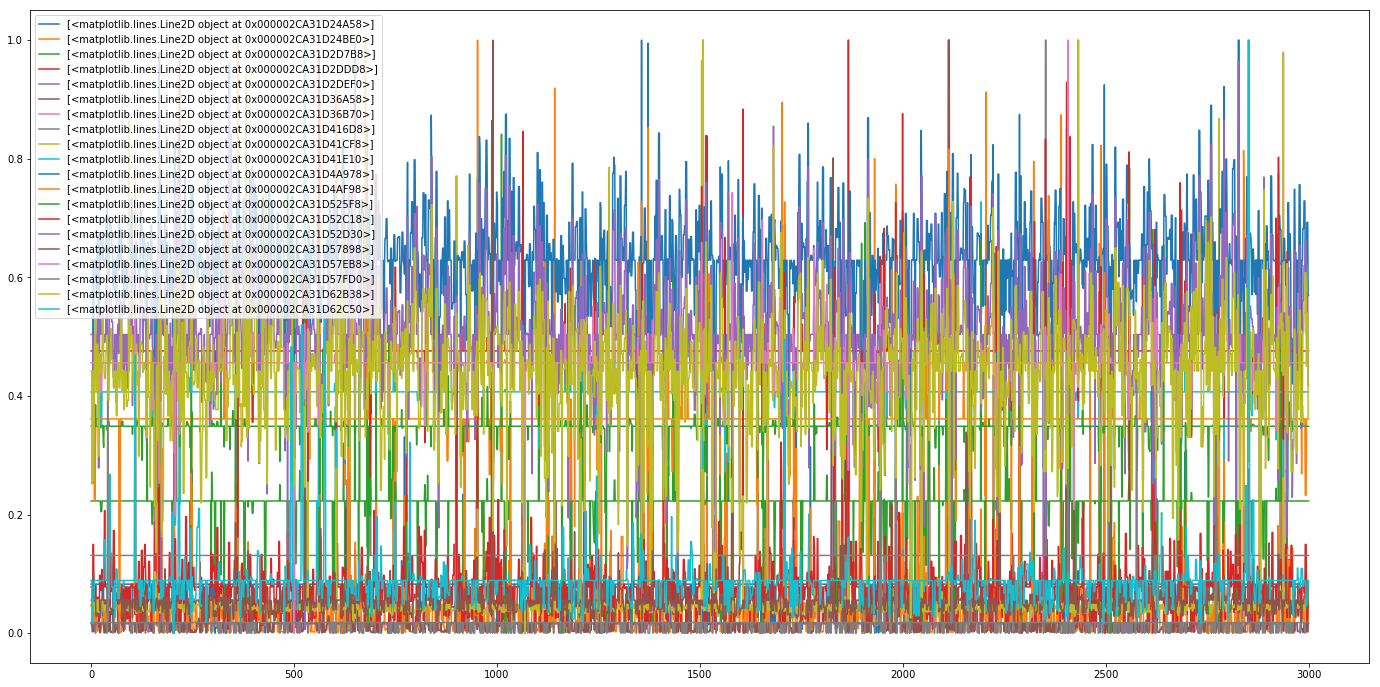

In [81]:
# 特征取值的分布（同一figure中）
x_plt = range(3000)
line = []
for i in range(20):
    line.append(plt.plot(x_plt,trainset[:,i]))
plt.legend(line)

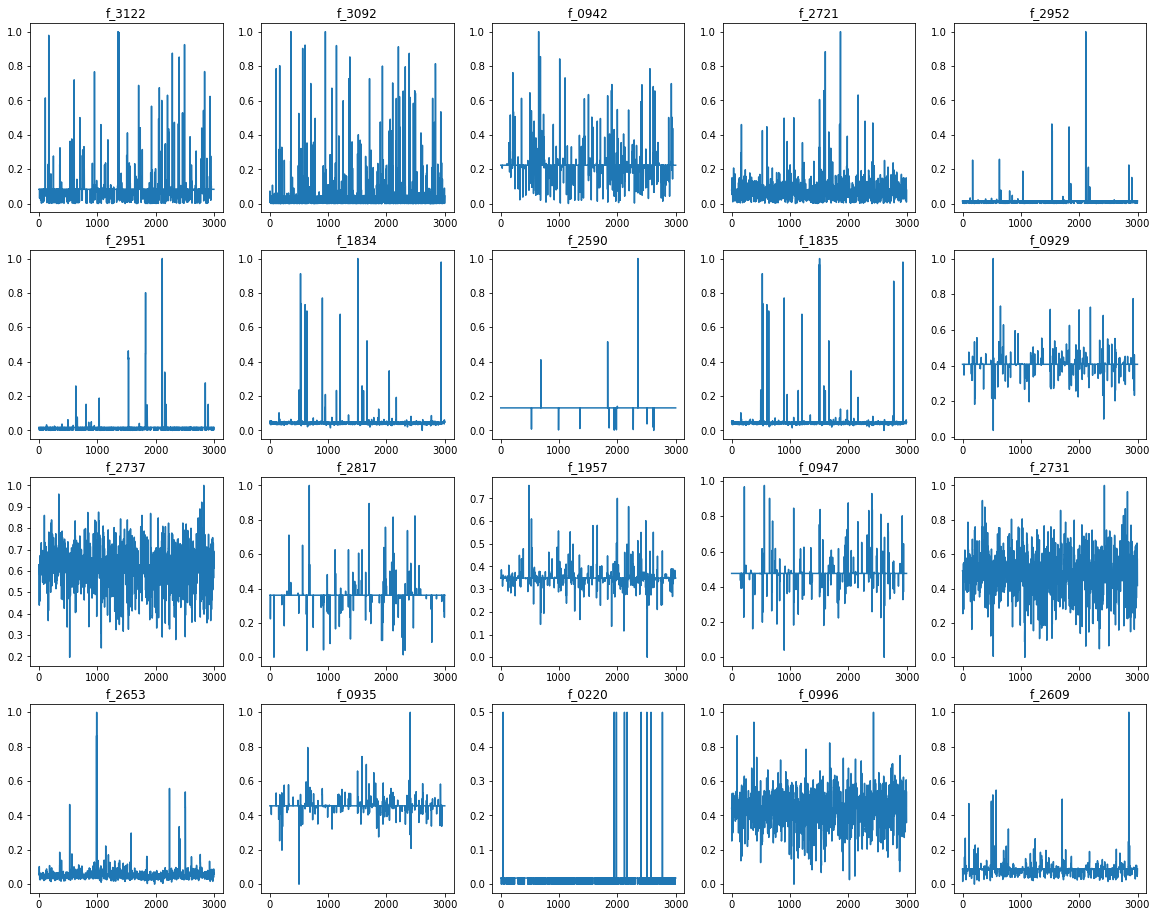

In [86]:
# 特征取值的分布（不同子图中）
fig, axes = plt.subplots(4,5,figsize=(20,16))
for i in range(20):
    tmp = axes[i//5,i%5]
    tmp.set_title(features[i])
    tmp.plot(x_plt, trainset[:,i])

([<matplotlib.axis.XTick at 0x2ca37818dd8>,
 <a list of 20 Text xticklabel objects>)

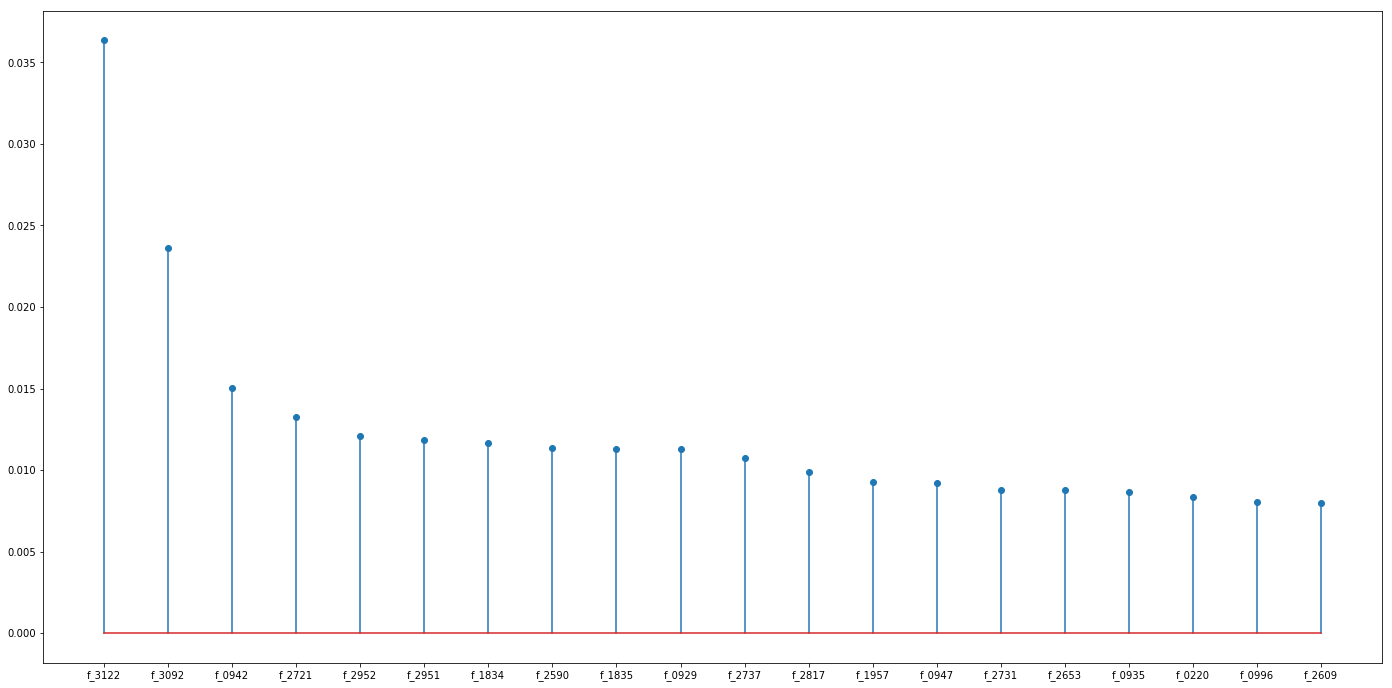

In [103]:
# 特征与预测目前之间的关系
data = [[features[i], importances[result[i]]] for i in range(20)]
x_plt = range(20)
plt.stem(x_plt, importances[result])
plt.xticks(x_plt,features)

### 任务4
如果需要在产品中使用。你会推荐使用之前哪个算法得到的模型？解释为什么。

#我会推荐 XGBoost算法 得到的模型。

'''
因为这个算法得到的准确率已经达到了95%以上，是一个准确率非常高，
且可以应用到实际生产场景中的模型了。
相比于logistics regression模型来说，XGBoost的准确率更高，且达到了实际场景应用的标准；
相比于random forest模型来说，XGBoost的训练集拟合程度更低，因此不易出现过拟合现象，
模型的泛化能力更强。
综合以上两点考虑，我会推荐 XGBoost算法 得到的模型。
'''


### 任务5

任务1～任务4体现了从得到建模数据，到完成建模实验的环节。

然而，对于整个建模项目来说，以上环节只是一部分工作内容。请候选人根据自己的经验和理解，描述从接到业务部门的需求开始（假设是一个0，1分类的监督式机器学习任务），到监控模型在产品中的使用情况为止，有哪些重要的工作环节？在这些过程中，机器学习建模工程师和业务部门成员如何分工？如何合作？

建议通过流程图配合必要的文字描述，表达自己的理解。





=============================================================
#这部分回答的格式调整不好，如果可以的话麻烦您编辑查看

'''工作环节：

 需求分析
            分工：  这两个环节中需要业务部门去调研用户或实际场景的需求；
   ↓             并需要建模工程师构思具体实现方法
            合作：  需要业务部门和工程师充分交流和沟通，讨论得到最终产
 任务设计           的原型设计以及设计可行性。
                         
   ↓
                            
 功能架构       分工：  这个环节需要工程师进行功能架构设计
                         
   ↓ ←—
        |
 产品原型  |
        |调试   分工：  这个环节需要业务部门负责对产品进行测试以及实验总结，
   ↓    |           工程师的工作则是得到业务部门的反馈之后及时调整
        |      合作：  需要业务部门和工程师之间及时沟通和反馈各自结果
 功能测试—
                         
   ↓
                            
   成品
                           
   ↓
                            
 用户反馈
'''

## 数据处理

### 任务6

history_df中存放了每个id，在不同time，对应的A, B的数值。

In [106]:
history_data = pd.read_csv('history_data.csv', parse_dates=['time'])
history_data


,id,time,A,B
0,1,2019-01-26 08:52:00,3.797676,8.432960
1,1,2019-01-29 14:59:00,NaN,4.157219
2,1,2019-01-13 00:01:00,6.516694,4.922487
3,1,2019-02-01 00:27:00,2.627256,NaN
4,1,2019-03-26 00:32:00,8.939391,NaN
5,2,2019-01-01 00:14:00,NaN,6.449302
6,2,2019-01-26 00:52:00,3.629338,1.529292
7,2,2019-02-04 00:05:00,4.299086,NaN
8,2,2019-02-28 00:51:00,NaN,3.140770
9,2,2019-03-01 00:44:00,6.353059,5.926424


sample_df存放了一些id和obs_time的组合。

In [105]:
sample_df = pd.read_csv('sample.csv')
sample_df

,id,obs_time
0,1,2019/3/7 0:00
1,1,2019/2/1 0:00
2,2,2019/3/15 0:00
3,2,2019/2/1 0:00


In [194]:
import time
print(list(sample_df['id']))
print(list(sample_df['id']))

[1, 1, 2, 2]
[1, 1, 2, 2]


对sample_df中每个id和obs_time的组合，计算离obs_time过去10, 60天内， 该id对应的A, B的最大值, 非空记录数量。将结果存在不同的列中。

例如:


最终的结果包含的列:
* id
* obs_time
* 10天内A平均值
* 10天内A非空样本数量
* 60天内A平均值
* 60天内A非空样本数量
* 10天内B平均值
* 10天内B非空样本数量
* 60天内B平均值
* 60天内B非空样本数量

将计算结果存为excel保存

In [185]:
# 开发相应的代码
#history_data sample_df
import datetime
history_data['time'] = pd.to_datetime(history_data['time'])
sample_df['obs_time'] = pd.to_datetime(sample_df['obs_time'])
id_1 = 0
while history_data['id'][id_1] == 1:
    id_1 += 1
id_2 = len(history_data['id'])

0   2019-03-07
1   2019-02-01
2   2019-03-15
3   2019-02-01
Name: obs_time, dtype: datetime64[ns]

In [162]:
idx_10 = []
idx_60 = []
for i in range(4):
    if sample_df['id'][i] == 1:
        start = 0
        end = id_1
    else:
        start = id_1
        end = id_2
    tmp_1 = [j for j in range(start,end) if 0 <= (sample_df['obs_time'][i]-history_data['time'][j]).days <= 10]
    tmp_2 = [j for j in range(start,end) if 0 <= (sample_df['obs_time'][i]-history_data['time'][j]).days <= 60]
    idx_10.append(tmp_1)
    idx_60.append(tmp_2)

In [200]:
mean_10_a, mean_10_b, not_null_10_a, not_null_10_b, mean_60_a, mean_60_b, not_null_60_a, not_null_60_b = [], [], [], [], [], [], [], []
for i in range(4):
    tmp = [a if ~np.isnan(a) else 0 for a in history_data['A'][idx_10[i]]]
    mean_10_a.append(np.mean(tmp))
    tmp = [a if ~np.isnan(a) else 0 for a in history_data['B'][idx_10[i]]]
    mean_10_b.append(np.mean(tmp))
    tmp = [a if ~np.isnan(a) else 0 for a in history_data['A'][idx_60[i]]]
    mean_60_a.append(np.mean(tmp))
    tmp = [a if ~np.isnan(a) else 0 for a in history_data['B'][idx_60[i]]]
    mean_60_b.append(np.mean(tmp))
    tmp = history_data['A'][idx_10[i]].isnull().sum(axis=0)
    not_null_10_a.append(np.mean(tmp))
    tmp = history_data['B'][idx_10[i]].isnull().sum(axis=0)
    not_null_10_b.append(np.mean(tmp))
    tmp = history_data['A'][idx_60[i]].isnull().sum(axis=0)
    not_null_60_a.append(np.mean(tmp))
    tmp = history_data['B'][idx_60[i]].isnull().sum(axis=0)
    not_null_60_b.append(np.mean(tmp))

[]
[3.797676374, 0]
[]
[3.629338202]


e:\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
e:\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [199]:
import xlsxwriter
headings = ['id',
         'obs_time',
         '10天内A平均值',
         '10天内A非空样本数量',
         '60天内A平均值',
         '60天内A非空样本数量',
         '10天内B平均值',
         '10天内B非空样本数量',
         '60天内B平均值',
         '60天内B非空样本数量']
time = []
for i in range(4):
    time.append(sample_df['obs_time'][i].strftime("%Y/%m/%d %H:%M:%S"))
id_list = list(sample_df['id'])
T = [id_list, time, mean_10_a, mean_10_b, not_null_10_a, not_null_10_b, mean_60_a, mean_60_b, not_null_60_a, not_null_60_b]
T

[[1, 1, 2, 2],
 ['2019/03/07 00:00:00',
  '2019/02/01 00:00:00',
  '2019/03/15 00:00:00',
  '2019/02/01 00:00:00'],
 [nan, 1.898838187, nan, 3.629338202],
 [nan, 6.2950892500000002, nan, 1.5292924290000001],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [3.23540663575, 3.4381233546666667, 2.6428081366666665, 1.814669101],
 [4.3781662585000003, 5.8375550113333334, 1.556687564, 3.9892971020000001],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 0.0, 1.0, 0.0]]

In [207]:
workbook = xlsxwriter.Workbook('result.xlsx', {'nan_inf_to_errors': True})
worksheet = workbook.add_worksheet('sheet1')
worksheet.write_row('A1',headings)
col = ['A2','B2','C2','D2','E2','F2','G2','H2','I2','J2','K2']
for i in range(len(T)):
    worksheet.write_column(col[i],T[i])
workbook.close()

# 反馈
建议看看[pandas文档这部分]('http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html'), 分组聚合是非常常见的数据处理需求，没必要造轮子